In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [36]:
class LimitFile:
    def __init__(self, fname):
        self.fname = fname

        import pickle
        with open(fname, 'rb') as f:
            self.__dict__.update(pickle.load(f))

        match = re.match(r'.*/MX-(\d+)_MY-(\d+)/.*', fname)
        self.mx = int(match.group(1))
        self.my = int(match.group(2))

        if 'mycuts' in fname:
            self.mycut = 0.1 * self.my
        else:
            self.mycut = None

In [129]:
path = '/home/ekoenig/analysis/studies/scripts/sixb/parametric/'

limit_files = []
for base, _, files in os.walk(path):
    if any(files):
        for f in files:
            if 'limit' in f:
                limit_files.append( LimitFile(os.path.join(base, f)) )

len(limit_files)

418

In [130]:
nominal = ObjIter(limit_files).filter(lambda f : f.mycut is None)
mycut = ObjIter(limit_files).filter(lambda f : f.mycut is not None)

In [131]:
nominal.objs.sort(key=lambda f : (f.mx, f.my))
mycut.objs.sort(key=lambda f : (f.mx, f.my))

In [132]:
def diff_lim(f):
    mask = (nominal.mx.npy == f.mx) & (nominal.my.npy == f.my)
    if not np.any(mask):
        f.diff_lim = np.nan
        return 
    f.diff_lim = f.exp_lim / nominal.exp_lim.npy[ mask ][0]
mycut.apply(diff_lim) 

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [142]:
def plot_mx_limits(limits):
    for my in np.unique(limits.my.npy):
        mask = limits.my.npy == my
        mask = mask & (limits.mx.npy <= 1200)
        if np.sum(mask) == 0: continue
        graph_array(limits.mx.npy[mask], limits.exp_lim.npy[mask] * 1e3, g_label=f'MY = {my}', figax='same', legend=True)

def plot_2d_limits(limits):
    graph2d_array(limits.mx.npy, limits.my.npy, limits.exp_lim.npy * 1e3, zlim=(0,100), size=100, colorbar=True,)

def plot_2d_diff(limits):
    graph2d_array(limits.mx.npy, limits.my.npy, limits.diff_lim.npy, zlim=(0,2), size=100, colorbar=True, g_cmap='bwr')

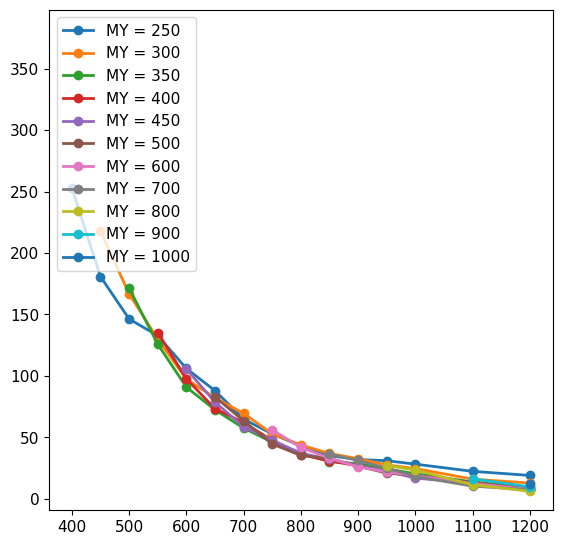

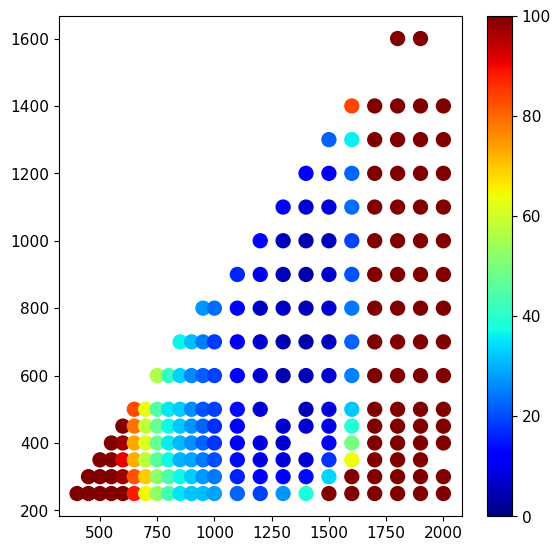

In [143]:
plot_mx_limits(nominal)
plot_2d_limits(nominal)

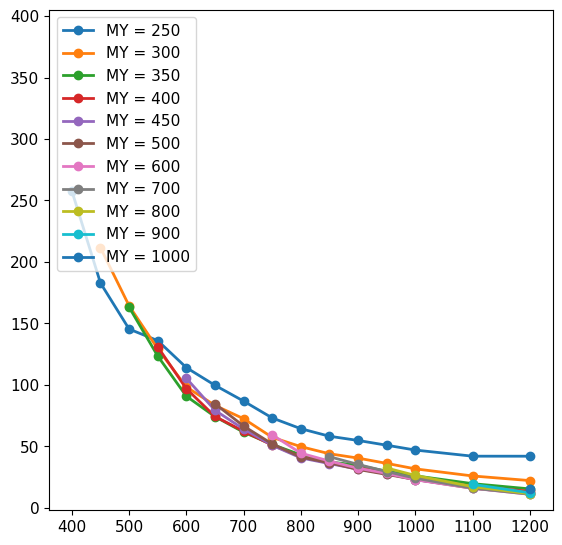

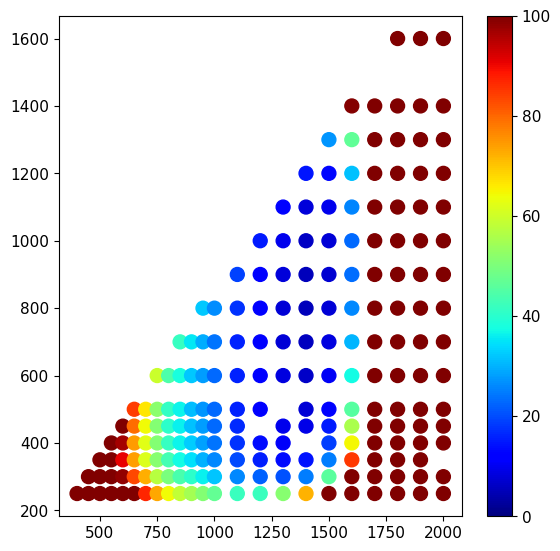

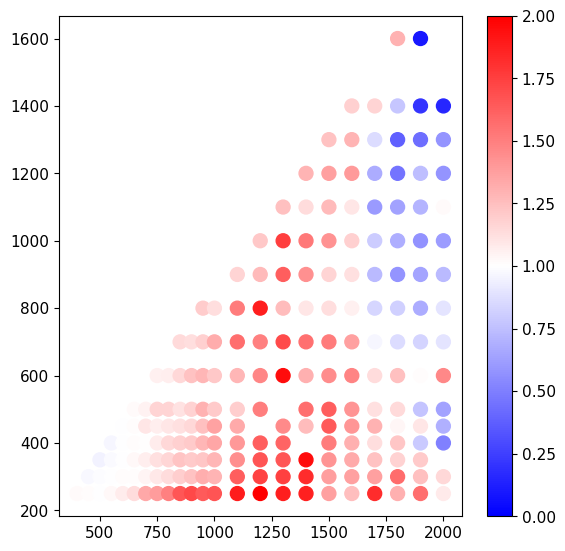

In [144]:
plot_mx_limits(mycut)
plot_2d_limits(mycut)
plot_2d_diff(mycut)

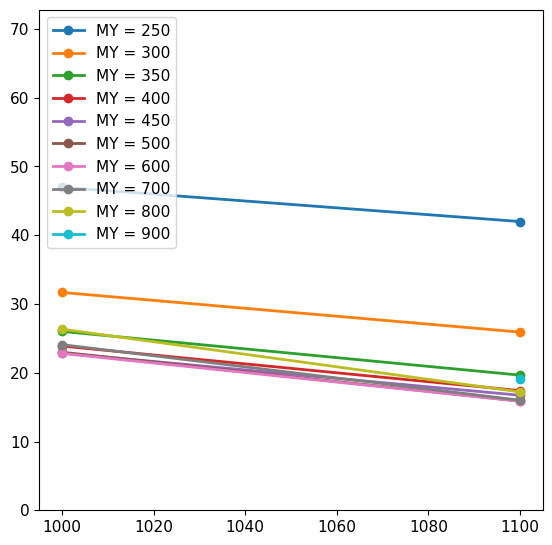